In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json

In [2]:
## randomized search
num_models = 8
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()

    param_grid = {
        "hidden_dim": [64, 128, 256, 512],
        "dropout": [0.1, 0.25, 0.5]
    }
    config["tgt_step"] = k-1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = 3*10**-3, n_epoch = 100, param_grid = param_grid)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

with open(f"{config['run']}_params.json", "w") as outfile: 
    json.dump({"param_grid": param_grid, "best_params": best_model_params}, outfile)

MODEL CROSS VALIDATING - #1
----------------------------------------


  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 512, dropout: 0.1, 


  8%|▊         | 1/12 [04:35<50:28, 275.29s/it]

Scores: 18210.38, 16840.19, 14282.56, 13712.40; avg score: 15761.38
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 17%|█▋        | 2/12 [09:06<45:29, 272.97s/it]

Scores: 17322.59, 15777.11, 15419.11, 13379.76; avg score: 15474.64
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 25%|██▌       | 3/12 [13:30<40:17, 268.65s/it]

Scores: 18314.55, 16617.63, 14531.24, 13680.67; avg score: 15786.02
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 33%|███▎      | 4/12 [17:52<35:28, 266.04s/it]

Scores: 17463.02, 15793.23, 15079.55, 13223.06; avg score: 15389.72
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 42%|████▏     | 5/12 [22:16<30:57, 265.39s/it]

Scores: 18009.63, 15865.61, 13515.76, 13203.39; avg score: 15148.60
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 50%|█████     | 6/12 [26:40<26:29, 264.89s/it]

Scores: 17505.26, 15561.04, 14764.50, 13253.93; avg score: 15271.18
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 58%|█████▊    | 7/12 [31:04<22:03, 264.63s/it]

Scores: 17520.41, 16561.52, 14456.83, 13557.80; avg score: 15524.14
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 67%|██████▋   | 8/12 [35:26<17:35, 263.96s/it]

Scores: 17315.27, 16042.59, 13835.29, 13350.97; avg score: 15136.03
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 75%|███████▌  | 9/12 [39:50<13:11, 263.85s/it]

Scores: 17207.72, 15811.59, 15006.21, 13344.80; avg score: 15342.58
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 83%|████████▎ | 10/12 [44:14<08:47, 263.80s/it]

Scores: 17317.37, 16013.01, 18244.55, 13623.83; avg score: 16299.69
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 92%|█████████▏| 11/12 [48:38<04:24, 264.04s/it]

Scores: 18028.53, 15727.42, 16892.35, 13442.54; avg score: 16022.71
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


100%|██████████| 12/12 [53:04<00:00, 265.36s/it]

Scores: 17407.56, 16261.55, 13719.49, 13156.00; avg score: 15136.15
--------------------
Best params: {'hidden_dim': 128, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #2
----------------------------------------



  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 128, dropout: 0.1, 


  8%|▊         | 1/12 [04:23<48:14, 263.14s/it]

Scores: 25254.29, 22942.89, 17794.70, 19176.30; avg score: 21292.04
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 17%|█▋        | 2/12 [08:47<43:59, 263.98s/it]

Scores: 25130.80, 23063.92, 21720.37, 18808.87; avg score: 22180.99
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 25%|██▌       | 3/12 [13:11<39:35, 263.90s/it]

Scores: 25282.26, 22758.94, 21711.51, 18867.26; avg score: 22154.99
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 33%|███▎      | 4/12 [17:34<35:07, 263.45s/it]

Scores: 25280.04, 22812.32, 18328.28, 19039.43; avg score: 21365.02
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 42%|████▏     | 5/12 [21:57<30:43, 263.43s/it]

Scores: 25462.68, 22254.87, 20976.18, 18699.39; avg score: 21848.28
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 50%|█████     | 6/12 [26:20<26:20, 263.35s/it]

Scores: 25043.73, 22504.40, 21790.41, 19066.34; avg score: 22101.22
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 58%|█████▊    | 7/12 [30:47<22:01, 264.39s/it]

Scores: 26473.69, 23797.27, 18209.53, 19467.24; avg score: 21986.93
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 67%|██████▋   | 8/12 [35:11<17:37, 264.43s/it]

Scores: 26065.82, 23793.60, 17729.83, 19367.64; avg score: 21739.22
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 75%|███████▌  | 9/12 [39:35<13:12, 264.30s/it]

Scores: 26040.86, 23629.06, 18423.14, 19554.61; avg score: 21911.92
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 83%|████████▎ | 10/12 [44:00<08:48, 264.26s/it]

Scores: 26014.02, 23493.78, 18249.53, 18919.43; avg score: 21669.19
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 92%|█████████▏| 11/12 [48:21<04:23, 263.51s/it]

Scores: 25421.33, 22546.17, 21445.42, 18778.47; avg score: 22047.85
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


100%|██████████| 12/12 [52:45<00:00, 263.83s/it]

Scores: 25252.66, 23867.16, 17791.46, 19020.14; avg score: 21482.85
--------------------
Best params: {'hidden_dim': 128, 'dropout': 0.1}
----------------------------------------
MODEL CROSS VALIDATING - #3
----------------------------------------



  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 256, dropout: 0.1, 


  8%|▊         | 1/12 [04:24<48:29, 264.46s/it]

Scores: 29091.97, 25403.74, 22074.42, 22108.54; avg score: 24669.67
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 17%|█▋        | 2/12 [08:47<43:57, 263.76s/it]

Scores: 28566.87, 24908.67, 21883.08, 21815.38; avg score: 24293.50
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 25%|██▌       | 3/12 [13:13<39:40, 264.52s/it]

Scores: 28683.26, 25180.90, 19817.27, 21564.61; avg score: 23811.51
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 33%|███▎      | 4/12 [17:38<35:19, 264.96s/it]

Scores: 28904.46, 25841.78, 19456.66, 21899.88; avg score: 24025.69
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 42%|████▏     | 5/12 [22:03<30:53, 264.80s/it]

Scores: 28428.90, 24695.98, 20350.46, 21546.64; avg score: 23755.50
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 50%|█████     | 6/12 [26:28<26:30, 265.05s/it]

Scores: 28770.29, 25797.24, 19760.01, 21953.29; avg score: 24070.21
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 58%|█████▊    | 7/12 [30:52<22:02, 264.45s/it]

Scores: 29373.61, 25120.67, 20292.66, 21824.13; avg score: 24152.77
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 67%|██████▋   | 8/12 [35:15<17:36, 264.20s/it]

Scores: 28659.82, 24756.70, 22153.34, 21461.72; avg score: 24257.89
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 75%|███████▌  | 9/12 [39:41<13:14, 264.70s/it]

Scores: 28539.51, 25443.34, 21620.92, 21861.68; avg score: 24366.36
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 83%|████████▎ | 10/12 [44:06<08:49, 264.73s/it]

Scores: 28739.35, 25155.84, 19926.26, 21847.68; avg score: 23917.28
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 92%|█████████▏| 11/12 [48:30<04:24, 264.65s/it]

Scores: 28666.03, 24728.86, 20652.21, 21300.19; avg score: 23836.82
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


100%|██████████| 12/12 [52:56<00:00, 264.74s/it]

Scores: 29130.88, 25298.69, 19489.56, 21610.95; avg score: 23882.52
--------------------
Best params: {'hidden_dim': 64, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #4
----------------------------------------



  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 128, dropout: 0.1, 


  8%|▊         | 1/12 [04:22<48:05, 262.35s/it]

Scores: 30212.17, 26737.95, 22594.53, 23447.77; avg score: 25748.11
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 17%|█▋        | 2/12 [08:47<43:58, 263.84s/it]

Scores: 30578.63, 27047.73, 20864.23, 23599.45; avg score: 25522.51
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 25%|██▌       | 3/12 [13:09<39:29, 263.27s/it]

Scores: 30713.79, 26425.32, 23916.66, 22967.56; avg score: 26005.83
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 33%|███▎      | 4/12 [17:33<35:08, 263.52s/it]

Scores: 30239.59, 26299.11, 22726.75, 22824.03; avg score: 25522.37
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 42%|████▏     | 5/12 [21:57<30:45, 263.71s/it]

Scores: 30542.64, 25899.28, 22684.14, 22716.21; avg score: 25460.57
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 50%|█████     | 6/12 [26:22<26:25, 264.17s/it]

Scores: 31008.60, 26655.29, 19897.43, 23045.49; avg score: 25151.70
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 58%|█████▊    | 7/12 [30:47<22:01, 264.37s/it]

Scores: 31111.12, 26233.73, 23174.95, 22729.92; avg score: 25812.43
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 67%|██████▋   | 8/12 [35:11<17:37, 264.35s/it]

Scores: 30445.54, 26256.00, 22908.35, 23398.08; avg score: 25751.99
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 75%|███████▌  | 9/12 [39:36<13:13, 264.56s/it]

Scores: 30425.00, 26429.03, 22661.10, 23409.57; avg score: 25731.17
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 83%|████████▎ | 10/12 [43:59<08:48, 264.01s/it]

Scores: 30641.77, 26256.55, 21445.09, 22748.98; avg score: 25273.10
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 92%|█████████▏| 11/12 [48:24<04:24, 264.38s/it]

Scores: 31005.15, 27510.08, 21620.94, 23000.20; avg score: 25784.09
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


100%|██████████| 12/12 [52:49<00:00, 264.17s/it]

Scores: 31016.82, 26903.80, 20847.62, 23115.94; avg score: 25471.05
--------------------
Best params: {'hidden_dim': 512, 'dropout': 0.5}
----------------------------------------
MODEL CROSS VALIDATING - #5
----------------------------------------



  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 64, dropout: 0.25, 


  8%|▊         | 1/12 [04:24<48:33, 264.88s/it]

Scores: 33122.91, 28679.98, 24612.81, 24734.52; avg score: 27787.56
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 17%|█▋        | 2/12 [08:50<44:10, 265.04s/it]

Scores: 34383.95, 28772.23, 22487.93, 25318.33; avg score: 27740.61
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 25%|██▌       | 3/12 [13:13<39:38, 264.32s/it]

Scores: 33630.75, 28241.42, 24271.20, 24669.55; avg score: 27703.23
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 33%|███▎      | 4/12 [17:40<35:21, 265.22s/it]

Scores: 33982.02, 29244.49, 24333.15, 25062.29; avg score: 28155.49
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 42%|████▏     | 5/12 [22:06<31:00, 265.76s/it]

Scores: 34165.27, 29084.07, 24190.56, 25479.68; avg score: 28229.89
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 50%|█████     | 6/12 [26:31<26:31, 265.32s/it]

Scores: 32885.60, 28564.10, 21680.42, 25039.11; avg score: 27042.31
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 58%|█████▊    | 7/12 [30:57<22:08, 265.72s/it]

Scores: 33852.53, 28999.21, 24815.74, 25148.07; avg score: 28203.89
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 67%|██████▋   | 8/12 [35:24<17:43, 265.95s/it]

Scores: 34420.42, 28842.36, 22447.24, 24968.86; avg score: 27669.72
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 75%|███████▌  | 9/12 [39:48<13:16, 265.38s/it]

Scores: 33014.45, 29220.23, 24813.54, 25280.86; avg score: 28082.27
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 83%|████████▎ | 10/12 [44:14<08:51, 265.60s/it]

Scores: 33362.89, 28555.72, 24092.14, 25058.15; avg score: 27767.22
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 92%|█████████▏| 11/12 [48:40<04:25, 265.82s/it]

Scores: 33514.23, 28375.42, 23920.96, 24994.56; avg score: 27701.29
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


100%|██████████| 12/12 [53:07<00:00, 265.61s/it]

Scores: 33162.81, 28382.19, 24543.40, 24650.06; avg score: 27684.61
--------------------
Best params: {'hidden_dim': 128, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #6
----------------------------------------



  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 64, dropout: 0.25, 


  8%|▊         | 1/12 [04:25<48:42, 265.72s/it]

Scores: 35698.00, 29544.33, 24210.46, 25763.11; avg score: 28803.97
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 17%|█▋        | 2/12 [08:51<44:19, 265.90s/it]

Scores: 35216.16, 31377.10, 22411.80, 26264.47; avg score: 28817.39
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 25%|██▌       | 3/12 [13:15<39:44, 264.93s/it]

Scores: 34750.87, 28927.08, 26091.68, 25812.94; avg score: 28895.64
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 33%|███▎      | 4/12 [17:40<35:21, 265.13s/it]

Scores: 34795.52, 29275.72, 24054.59, 26239.72; avg score: 28591.39
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 42%|████▏     | 5/12 [22:06<30:57, 265.34s/it]

Scores: 34768.68, 29195.94, 24865.56, 25705.25; avg score: 28633.86
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 50%|█████     | 6/12 [26:32<26:33, 265.53s/it]

Scores: 35388.66, 29628.57, 23592.76, 26361.46; avg score: 28742.86
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 58%|█████▊    | 7/12 [30:56<22:05, 265.03s/it]

Scores: 35133.73, 29385.95, 26250.45, 26229.22; avg score: 29249.84
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 67%|██████▋   | 8/12 [35:22<17:41, 265.29s/it]

Scores: 34919.96, 29476.08, 24842.31, 25861.84; avg score: 28775.05
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 75%|███████▌  | 9/12 [39:45<13:14, 264.74s/it]

Scores: 34204.09, 29328.04, 23834.74, 26062.13; avg score: 28357.25
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 83%|████████▎ | 10/12 [44:11<08:50, 265.14s/it]

Scores: 34864.46, 29596.11, 23978.70, 26038.17; avg score: 28619.36
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 92%|█████████▏| 11/12 [48:37<04:25, 265.15s/it]

Scores: 36608.86, 29254.79, 22843.21, 26369.41; avg score: 28769.07
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


100%|██████████| 12/12 [53:01<00:00, 265.17s/it]

Scores: 35925.74, 29441.64, 23089.40, 26184.75; avg score: 28660.38
--------------------
Best params: {'hidden_dim': 128, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #7
----------------------------------------



  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 64, dropout: 0.1, 


  8%|▊         | 1/12 [04:23<48:21, 263.81s/it]

Scores: 37020.30, 29605.81, 25465.82, 26864.79; avg score: 29739.18
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 17%|█▋        | 2/12 [08:48<44:02, 264.26s/it]

Scores: 35136.95, 30019.58, 24100.04, 26880.68; avg score: 29034.31
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 25%|██▌       | 3/12 [13:13<39:40, 264.46s/it]

Scores: 35965.86, 29614.41, 22658.44, 26391.31; avg score: 28657.50
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 33%|███▎      | 4/12 [17:36<35:13, 264.18s/it]

Scores: 34711.29, 29518.18, 24283.79, 26387.33; avg score: 28725.15
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 42%|████▏     | 5/12 [22:01<30:50, 264.35s/it]

Scores: 35881.67, 30969.35, 24421.50, 27014.74; avg score: 29571.82
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


 50%|█████     | 6/12 [26:26<26:27, 264.51s/it]

Scores: 35701.88, 29767.12, 23386.36, 26538.68; avg score: 28848.51
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 58%|█████▊    | 7/12 [30:48<21:59, 263.87s/it]

Scores: 35330.06, 29511.79, 24207.13, 26376.00; avg score: 28856.25
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 67%|██████▋   | 8/12 [35:14<17:37, 264.45s/it]

Scores: 36099.29, 29773.94, 22566.23, 26867.30; avg score: 28826.69
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 75%|███████▌  | 9/12 [39:41<13:15, 265.08s/it]

Scores: 36391.21, 31066.32, 24226.39, 27093.52; avg score: 29694.36
--------------------
hyperparams: hidden_dim: 128, dropout: 0.25, 


 83%|████████▎ | 10/12 [44:04<08:49, 264.59s/it]

Scores: 36070.12, 29949.51, 22554.45, 26506.02; avg score: 28770.03
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 92%|█████████▏| 11/12 [48:27<04:23, 263.99s/it]

Scores: 35770.62, 29660.87, 23805.55, 26618.08; avg score: 28963.78
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


100%|██████████| 12/12 [52:50<00:00, 264.24s/it]

Scores: 34956.18, 29749.05, 26457.88, 26625.98; avg score: 29447.27
--------------------
Best params: {'hidden_dim': 256, 'dropout': 0.5}
----------------------------------------
MODEL CROSS VALIDATING - #8
----------------------------------------



  0%|          | 0/12 [00:00<?, ?it/s]

hyperparams: hidden_dim: 128, dropout: 0.25, 


  8%|▊         | 1/12 [04:22<48:09, 262.67s/it]

Scores: 36366.15, 29610.90, 23331.90, 26981.38; avg score: 29072.58
--------------------
hyperparams: hidden_dim: 128, dropout: 0.1, 


 17%|█▋        | 2/12 [08:45<43:46, 262.67s/it]

Scores: 36690.33, 30030.81, 22527.49, 27072.46; avg score: 29080.27
--------------------
hyperparams: hidden_dim: 256, dropout: 0.1, 


 25%|██▌       | 3/12 [13:10<39:32, 263.63s/it]

Scores: 36282.88, 30327.86, 23257.18, 27183.54; avg score: 29262.87
--------------------
hyperparams: hidden_dim: 64, dropout: 0.1, 


 33%|███▎      | 4/12 [17:34<35:10, 263.76s/it]

Scores: 36564.64, 29694.29, 25398.23, 26895.82; avg score: 29638.25
--------------------
hyperparams: hidden_dim: 128, dropout: 0.5, 


 42%|████▏     | 5/12 [21:56<30:43, 263.39s/it]

Scores: 35891.73, 29772.56, 22952.80, 26712.80; avg score: 28832.47
--------------------
hyperparams: hidden_dim: 512, dropout: 0.1, 


 50%|█████     | 6/12 [26:21<26:23, 263.85s/it]

Scores: 37075.93, 30518.16, 22979.16, 27186.71; avg score: 29439.99
--------------------
hyperparams: hidden_dim: 512, dropout: 0.25, 


 58%|█████▊    | 7/12 [30:46<22:00, 264.16s/it]

Scores: 36545.46, 30530.20, 25473.99, 27204.83; avg score: 29938.62
--------------------
hyperparams: hidden_dim: 64, dropout: 0.25, 


 67%|██████▋   | 8/12 [35:10<17:36, 264.01s/it]

Scores: 36045.41, 30364.99, 25009.71, 26861.86; avg score: 29570.49
--------------------
hyperparams: hidden_dim: 256, dropout: 0.5, 


 75%|███████▌  | 9/12 [39:35<13:13, 264.33s/it]

Scores: 35337.95, 29984.32, 22700.24, 26607.14; avg score: 28657.41
--------------------
hyperparams: hidden_dim: 256, dropout: 0.25, 


 83%|████████▎ | 10/12 [43:59<08:48, 264.48s/it]

Scores: 36271.09, 30280.03, 25606.03, 27116.70; avg score: 29818.46
--------------------
hyperparams: hidden_dim: 64, dropout: 0.5, 


 92%|█████████▏| 11/12 [48:23<04:24, 264.35s/it]

Scores: 36361.89, 29949.12, 27214.09, 26618.84; avg score: 30035.98
--------------------
hyperparams: hidden_dim: 512, dropout: 0.5, 


100%|██████████| 12/12 [52:48<00:00, 264.08s/it]

Scores: 36051.92, 30368.05, 23730.07, 26729.05; avg score: 29219.77
--------------------
Best params: {'hidden_dim': 256, 'dropout': 0.5}
----------------------------------------


In [3]:
best_model_params

[{'hidden_dim': 128, 'dropout': 0.25},
 {'hidden_dim': 128, 'dropout': 0.1},
 {'hidden_dim': 64, 'dropout': 0.25},
 {'hidden_dim': 512, 'dropout': 0.5},
 {'hidden_dim': 128, 'dropout': 0.25},
 {'hidden_dim': 128, 'dropout': 0.25},
 {'hidden_dim': 256, 'dropout': 0.5},
 {'hidden_dim': 256, 'dropout': 0.5}]

In [2]:
best_model_params = [
        {
            "hidden_dim": 64,
            "dropout": 0.5
        },
        {
            "hidden_dim": 128,
            "dropout": 0.25
        },
        {
            "hidden_dim": 512,
            "dropout": 0.5
        },
        {
            "hidden_dim": 128,
            "dropout": 0.25
        },
        {
            "hidden_dim": 256,
            "dropout": 0.5
        },
        {
            "hidden_dim": 64,
            "dropout": 0.1
        },
        {
            "hidden_dim": 512,
            "dropout": 0.5
        },
        {
            "hidden_dim": 128,
            "dropout": 0.5
        }
    ]

In [5]:
## Multiple model training
cfg = get_config()
num_models = 8

for k in range(1, num_models+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['num_epochs'] = 1
    cfg['run'] = 'test_test'

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    for param_name in best_model_params[0].keys():
        cfg[param_name] = best_model_params[k-1][param_name]
        
    model = train_model(cfg)

    par_size = sum(p.numel() for p in model.parameters() if p.requires_grad)/1000
    print(f"{par_size:.1f}K")

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

MODEL TRAINING - #1
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:08<00:00, 73.55it/s, step_loss=37181.508] 


Training loss of epoch 0: 28762.374365078376


100%|██████████| 14/14 [00:00<00:00, 123.15it/s]


Validation loss of epoch 0: 24028.25
46.5K
--------------------
MODEL TRAINING - #2
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:13<00:00, 45.93it/s, step_loss=5119.088] 


Training loss of epoch 0: 27941.016577382437


100%|██████████| 14/14 [00:00<00:00, 54.62it/s]


Validation loss of epoch 0: 24271.74609375
95.7K
--------------------
MODEL TRAINING - #3
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:13<00:00, 47.93it/s, step_loss=7803.443] 


Training loss of epoch 0: 27511.664693521616


100%|██████████| 14/14 [00:00<00:00, 50.49it/s]


Validation loss of epoch 0: 24254.931640625
393.7K
--------------------
MODEL TRAINING - #4
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:08<00:00, 70.39it/s, step_loss=32145.281]


Training loss of epoch 0: 29029.020732453075


100%|██████████| 14/14 [00:00<00:00, 56.38it/s]


Validation loss of epoch 0: 26111.771484375
101.1K
--------------------
MODEL TRAINING - #5
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:10<00:00, 57.32it/s, step_loss=13856.045]


Training loss of epoch 0: 29450.013930835663


100%|██████████| 14/14 [00:00<00:00, 41.65it/s]


Validation loss of epoch 0: 26996.296875
207.6K
--------------------
MODEL TRAINING - #6
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:14<00:00, 44.16it/s, step_loss=16698.449]


Training loss of epoch 0: 30202.827706918928


100%|██████████| 14/14 [00:00<00:00, 64.13it/s]


Validation loss of epoch 0: 28032.392578125
53.2K
--------------------
MODEL TRAINING - #7
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:31<00:00, 19.77it/s, step_loss=2390.559] 


Training loss of epoch 0: 29411.403677943417


100%|██████████| 14/14 [00:00<00:00, 35.89it/s]


Validation loss of epoch 0: 27804.0859375
436.7K
--------------------
MODEL TRAINING - #8
--------------------
Using device: cpu


Processing Epoch 00: 100%|██████████| 626/626 [00:18<00:00, 34.66it/s, step_loss=4282.436] 


Training loss of epoch 0: 30311.168698051868


100%|██████████| 14/14 [00:00<00:00, 22.04it/s]


Validation loss of epoch 0: 27854.982421875
111.9K
--------------------


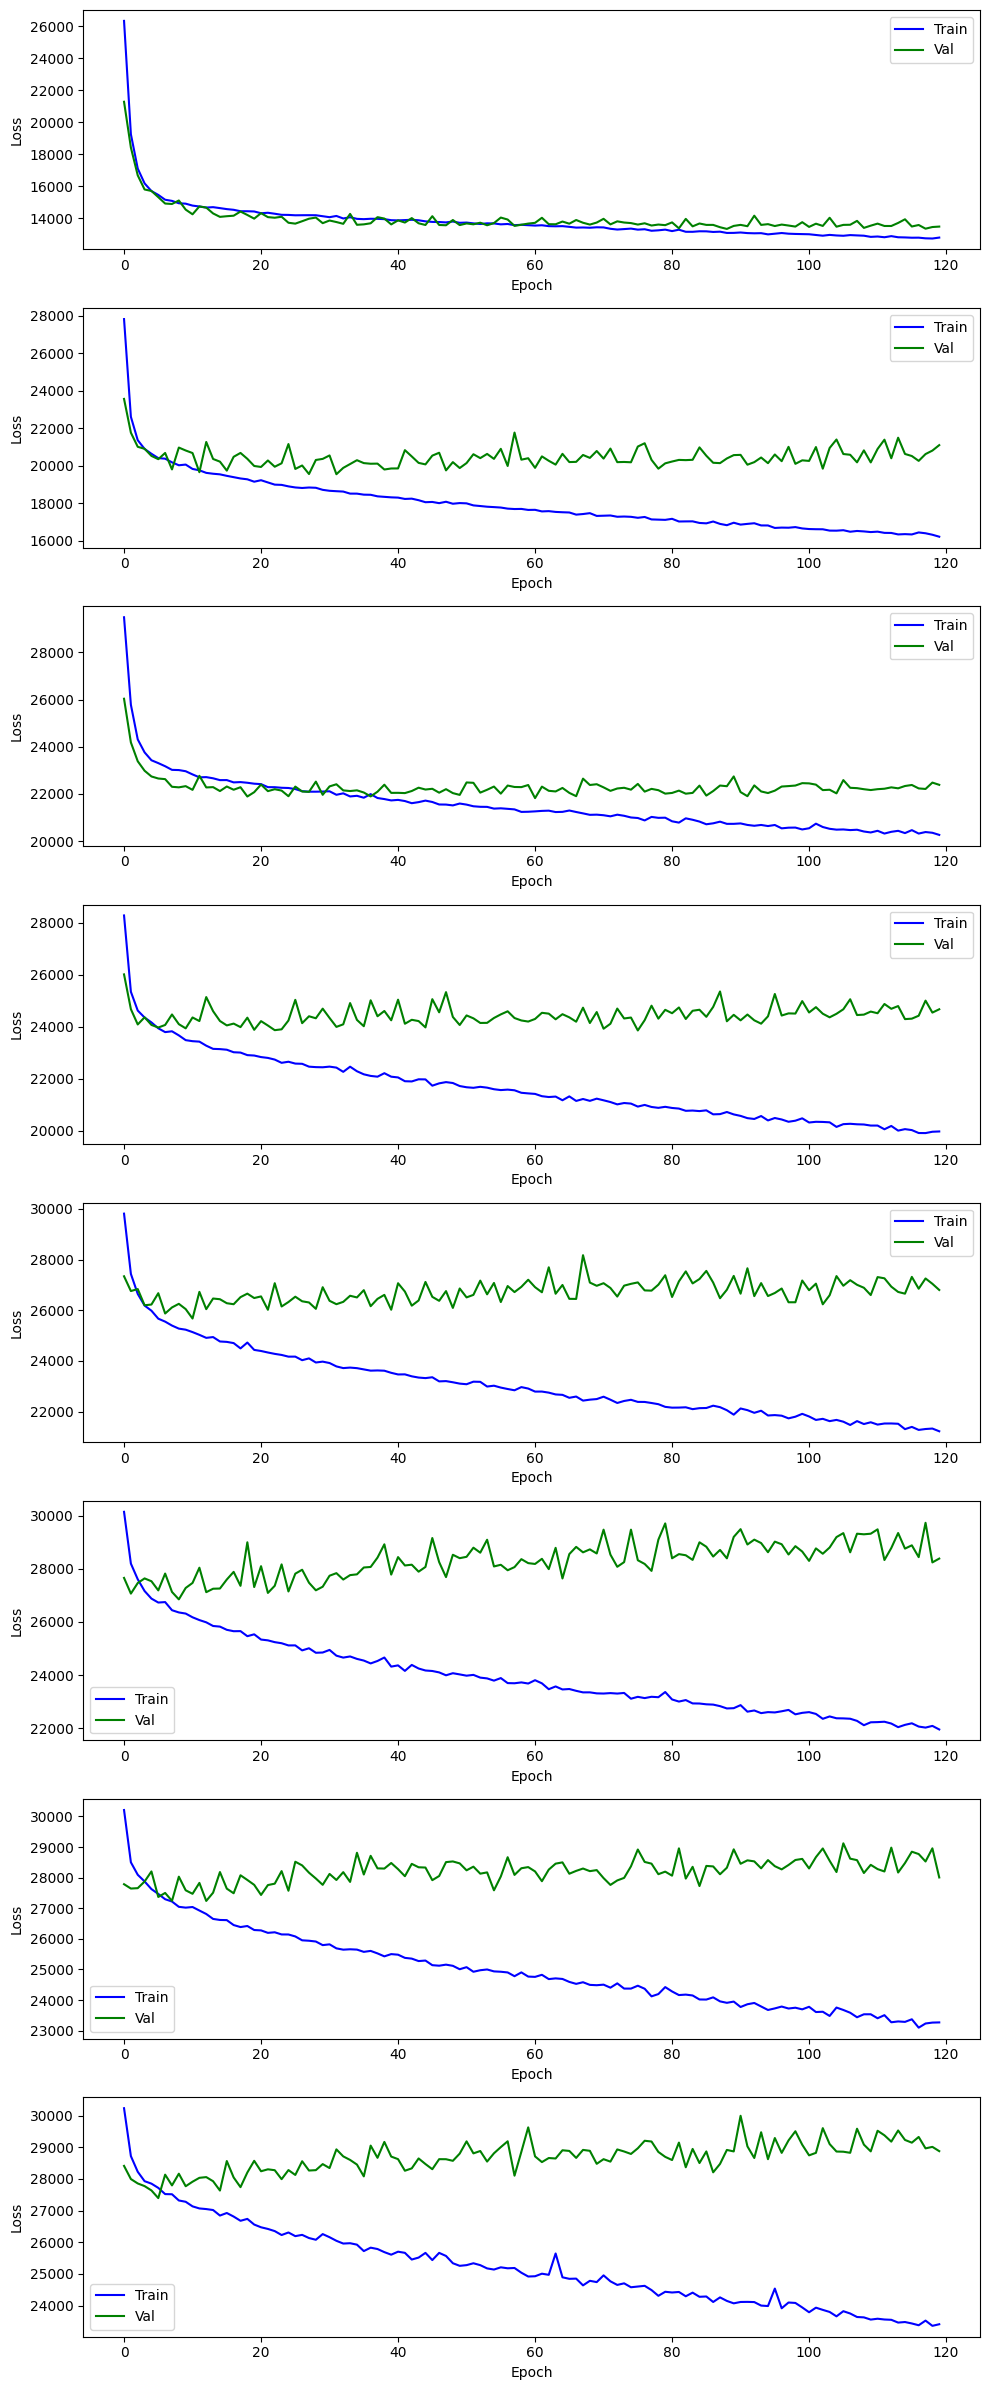

In [5]:
inference_helpers.arrange_figures_in_rows(n_rows=num_models, prefix="final_nfl_")